<h2>Imports</h2>
<ul>
    <li>Pandas</li>
    <li>Numpy</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Scikit-Learn</li>
</ul>

In [14]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import copy

# Scikit_Learn imports
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron

<h2>Load data & Normalize</h2>
<ul>
    <li>Normalize dataset (Using standard scalar)</li>
    <li>Split train and test data (test size is 20% of all dataset)</li>
</ul>

In [13]:
# Load dataset
cancer_X = load_breast_cancer()['data']
cancer_y = load_breast_cancer()['target']

# Normalize dataset
scalar = StandardScaler()
normalized_cancer_X = scalar.fit_transform(cancer_X)

# Spliting train and test data
X_train, X_test, y_train, y_test = train_test_split(normalized_cancer_X, cancer_y, test_size=0.2, random_state=42)

# Show the shape of each part
print(f"Train data shape : {X_train.shape}")
print(f"Test data shape : {X_test.shape}")


Train data shape : (455, 30)
Test data shape : (114, 30)


<h2>PCA & Perceptron applied</h2>
<ul>
    <li>Reduce dimensionality by using PCA</li>
    <li>Apply perceptron by using repeated k folds</li>
    <li>Calculate evaluation metrics on it</li>
</ul>

In [20]:
# Define desired dimensions
desired_dimensions = [20, 15, 10, 5, 4, 3, 2]

# Final MSEs
results = dict()

# Start to fit
for dimension in desired_dimensions:
    # Define Repeated K Folds 
    cv = RepeatedKFold(n_repeats=10, n_splits=5, random_state=42)

    # Shuffle the Training data
    np.random.shuffle(X_train)

    for train_index, validation_index in cv.split(X_train):
        X_train_fold = X_train[train_index]
        y_train_fold = y_train[train_index]
        X_validation_fold = X_train[validation_index]
        y_validation_fold = y_train[validation_index]

        # Apply PCA
        pca = PCA(n_components=dimension)
        X_train_fold_reduced = pca.fit_transform(X_train_fold)  # Fit transform on 80% of the train set
        X_validation_fold_reduced = pca.transform(X_validation_fold)

        # Apply Perceptron
        perceptron = Perceptron()
        perceptron.fit(X_train_fold_reduced, y_train_fold)

        # Calculate evaluation metrics
        train_pred = perceptron.predict(X_train_fold_reduced)
        validation_pred = perceptron.predict(X_validation_fold_reduced)

        # Accuracy score
        acc_train = accuracy_score(y_train_fold, train_pred)
        acc_val = accuracy_score(y_validation_fold, validation_pred)

        # Precision score
        prec_train = precision_score(y_train_fold, train_pred, average='weighted')
        prec_val = precision_score(y_validation_fold, validation_pred, average='weighted')

        # Recall score
        rec_train = recall_score(y_train_fold, train_pred, average='weighted')
        rec_val = recall_score(y_validation_fold, validation_pred, average='weighted')

        # F1 score
        f1_train = f1_score(y_train_fold, train_pred, average='weighted')
        f1_val = f1_score(y_validation_fold, validation_pred, average='weighted')

        # Store metrics of validation and train folds
        if dimension not in results:
            results[dimension] = {'train': {'accuracy': [copy.deepcopy(acc_train)], 'precision': [copy.deepcopy(prec_train)],
                                                'recall': [copy.deepcopy(rec_train)], 'f1score': [copy.deepcopy(f1_train)]}
                                     , 'validation': {'accuracy': [copy.deepcopy(acc_val)], 'precision': [copy.deepcopy(prec_val)], 
                                                      'recall': [copy.deepcopy(rec_val)], 'f1score': [copy.deepcopy(f1_val)]}}
        elif dimension in results:
            results[dimension]['train']['accuracy'].append(copy.deepcopy(acc_train))
            results[dimension]['train']['precision'].append(copy.deepcopy(prec_train))
            results[dimension]['train']['recall'].append(copy.deepcopy(rec_train))
            results[dimension]['train']['f1score'].append(copy.deepcopy(f1_train))
            results[dimension]['validation']['accuracy'].append(copy.deepcopy(acc_val))
            results[dimension]['validation']['precision'].append(copy.deepcopy(prec_val))
            results[dimension]['validation']['recall'].append(copy.deepcopy(rec_val))
            results[dimension]['validation']['f1score'].append(copy.deepcopy(f1_val))
        else:
            raise Exception("ERROR")


e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_project_no4\.env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2>Boxplot</h2>
<h4>Train set</h4>
<ul>
    <li>Accuracy</li>
    <li>Precision</li>
    <li>Recall</li>
    <li>F1 score</li>
</ul>
<h4>Validation set</h4>
<ul>
    <li>Accuracy</li>
    <li>Precision</li>
    <li>Recall</li>
    <li>F1 score</li>
</ul>

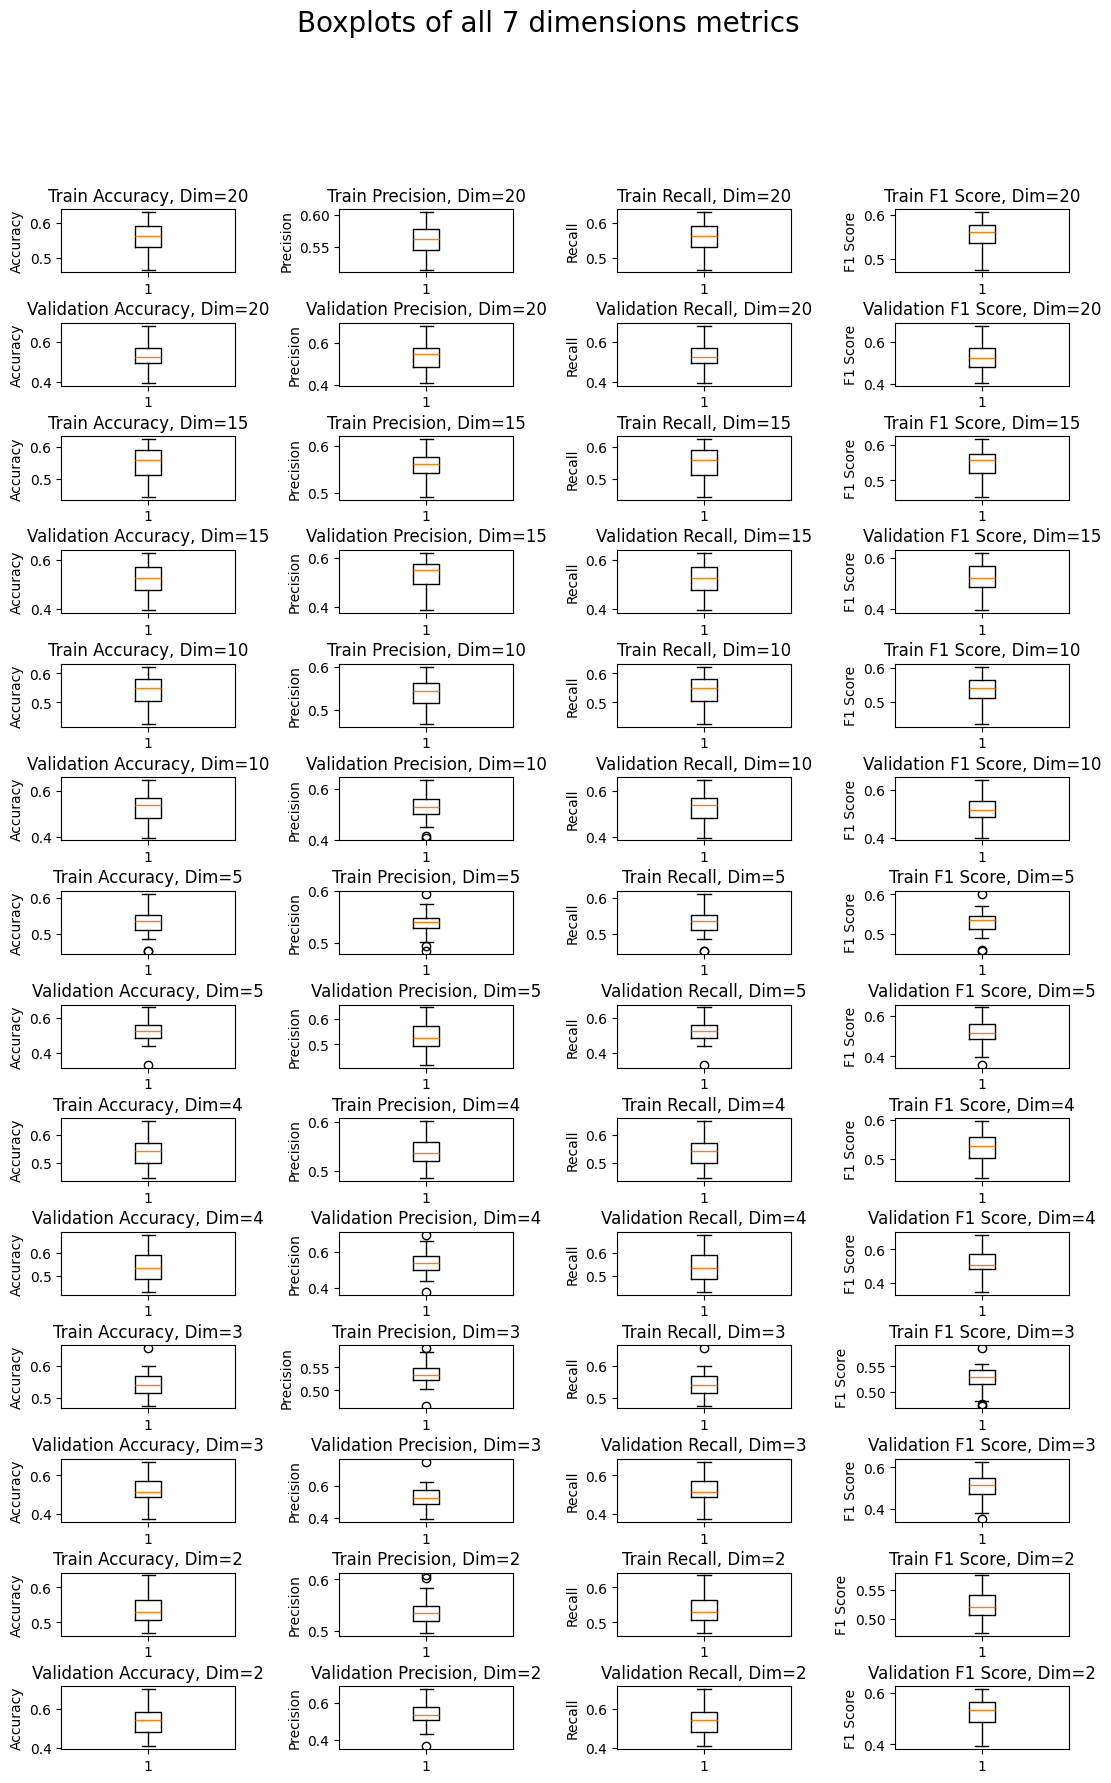

In [31]:
fig, axes = plt.subplots(nrows=14, ncols=4, figsize=(13, 20))
fig.subplots_adjust(wspace=0.6, hspace=0.8)
fig.suptitle("Boxplots of all 7 dimensions metrics", fontsize= 20)

for i in range(14):
    if i % 2 == 0:
        ax_1 = axes[i, 0]
        ax_2 = axes[i, 1]
        ax_3 = axes[i, 2]
        ax_4 = axes[i, 3]
        ax_1.set_ylabel("Accuracy")
        ax_2.set_ylabel("Precision")
        ax_3.set_ylabel("Recall")
        ax_4.set_ylabel("F1 Score")
        ax_1.boxplot(results[desired_dimensions[i // 2]]['train']['accuracy'])
        ax_2.boxplot(results[desired_dimensions[i // 2]]['train']['precision'])
        ax_3.boxplot(results[desired_dimensions[i // 2]]['train']['recall'])
        ax_4.boxplot(results[desired_dimensions[i // 2]]['train']['f1score'])
        ax_1.set_title(f"Train Accuracy, Dim={desired_dimensions[i // 2]}")
        ax_2.set_title(f"Train Precision, Dim={desired_dimensions[i // 2]}")
        ax_3.set_title(f"Train Recall, Dim={desired_dimensions[i // 2]}")
        ax_4.set_title(f"Train F1 Score, Dim={desired_dimensions[i // 2]}")
    else:
        ax_1 = axes[i, 0]
        ax_2 = axes[i, 1]
        ax_3 = axes[i, 2]
        ax_4 = axes[i, 3]
        ax_1.set_ylabel("Accuracy")
        ax_2.set_ylabel("Precision")
        ax_3.set_ylabel("Recall")
        ax_4.set_ylabel("F1 Score")
        ax_1.boxplot(results[desired_dimensions[i // 2]]['validation']['accuracy'])
        ax_2.boxplot(results[desired_dimensions[i // 2]]['validation']['precision'])
        ax_3.boxplot(results[desired_dimensions[i // 2]]['validation']['recall'])
        ax_4.boxplot(results[desired_dimensions[i // 2]]['validation']['f1score'])
        ax_1.set_title(f"Validation Accuracy, Dim={desired_dimensions[i // 2]}")
        ax_2.set_title(f"Validation Precision, Dim={desired_dimensions[i // 2]}")
        ax_3.set_title(f"Validation Recall, Dim={desired_dimensions[i // 2]}")
        ax_4.set_title(f"Validation F1 Score, Dim={desired_dimensions[i // 2]}")

plt.show()

<h2>Dimension selection</h2>
<p>As you can see in the boxplots above, the results of the metrics are not overally good enough, but in decreasing dimension from 20 to 5, the accuracy, precision, recall and f1 score do not fall in a impressive way, so in my opinion dim=5 can be a good choice for use with abaout 3 or 4 precent lower that dim=20 in every metrics in validation set and in train set coresponding metrics roughly are the same</p>